In [1]:
import re
import nltk

# You only need to download these resources once. After you run this 
# the first time--or if you know you already have these installed--
# you can comment these two lines out (with a #)
#nltk.download('stopwords')
#nltk.download('wordnet')


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
import pandas as pd


# read the data
#csv_read = pd.read_csv(r_filenameCSV)
tsv_read = pd.read_csv(r"C:\Users\Pratyush\Downloads\tc_nx_sap_support - Editable.csv")

# print the first 10 records
#print(csv_read.head(10))
print(tsv_read.head(10))


   Issue ID                                              Title  \
0      2142              ER-Classification quality improvement   
1      2182                               ER-STEP Type Dataset   
2      2229                               ER-BOM REPORT ISSUES   
3      2497                         ER-VS: Vekt fra TC til SAP   
4      2508                         ER-VS: Vekt fra TC til SAP   
5      2526  ER-VS: Forbedringsforslag for klassesuffix-pro...   
6      2539               ER-RE: Wrong drawing revision in SAP   
7      2573  ER-Enhancement request: PNAS Check for release...   
8      2575  ER- Copy, paste on item revision for DW item r...   
9      2648  ER-Removing of old Document ID and Document Rv ID   

                                         Description Issue Status  \
0  Hi,\nfind attached one example of possible cle...       Active   
1  Hi\nIs it possible to add a „new“ dataset type...       Active   
2  Hi Omar,\nI just discussed this with hiresh. B...       Active 

In [3]:
dataset=tsv_read
dataset.head()

,Issue ID,Title,Description,Issue Status,Resolution
0,2142,ER-Classification quality improvement,"Hi,\nfind attached one example of possible cle...",Active,​Moved to DATA Streaming
1,2182,ER-STEP Type Dataset,Hi\nIs it possible to add a „new“ dataset type...,Active,NaN
2,2229,ER-BOM REPORT ISSUES,"Hi Omar,\nI just discussed this with hiresh. B...",Active,NaN
3,2497,ER-VS: Vekt fra TC til SAP,"Hi,\nFind attached list of wheigths. How can w...",Active,NaN
4,2508,ER-VS: Vekt fra TC til SAP,Data Stream,Active,NaN


In [4]:
dataset.columns

Index(['Issue ID', 'Title', 'Description', 'Issue Status', 'Resolution'], dtype='object')

In [5]:
datacol = input('\n---\nWhich column contains the text data you would like to analyze?\n\n')


---
Which column contains the text data you would like to analyze?

Title


In [6]:

res=''
for i in dataset[datacol]:
    res+=i
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

data=''
for i in res:
    data+=wordnet_lemmatizer.lemmatize(i)
nltk_tokens = nltk.word_tokenize(data)

In [7]:
freq = pd.Series(' '.join(map(str, nltk_tokens)).split()).value_counts()[:10]
freq

-       444
to      421
:       414
of      262
in      251
for     204
.       165
,       165
item    151
and     134
dtype: int64

In [8]:
csw = set(line.strip() for line in open(r"C:\Users\Pratyush\Downloads\stopwords_Pro.txt"))
csw = [sw.lower() for sw in csw]
print(sorted(csw))

[',', '-', '.', ':', ';', 'be', 'in', 'of', 'to']


In [9]:
stop_words = set(stopwords.words("english"))
#print(sorted(stop_words))
stop_words = stop_words.union(csw)
print(sorted(stop_words))


[',', '-', '.', ':', ';', 'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "

In [10]:
corpus = []
#stop_words=['', 'bom', 'design', 'document', 'erp', 'error', 'item', 'sap']

dataset['word_count'] = dataset[datacol].apply(lambda x: len(str(x).split(" ")))
ds_count = len(dataset.word_count)
for i in range(0, ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(dataset[datacol][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    #print(stop_words)
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [11]:
print(corpus)

['er classification quality improvement', 'er step type dataset', 'er bom report issue', 'er v vekt fra tc til sap', 'er v vekt fra tc til sap', 'er v forbedringsforslag klassesuffix prose', 'er wrong drawing revision sap', 'er enhancement request pnas check release sap description', 'er copy paste item revision dw item revision', 'er removing old document id document rv id', 'er fw ar tekst', 'er classification attribute plf form', 'er ocn approval complete mail workflow name added subject mail', 'er ocn workflow getting correct excel', 'er setup outlook item tc', 'branch stainless steel aisi', 'w urgent obsolete material j cock', 'er fw document added td document', 'er referenced report show incorrect result', 'er tc issue', 'er material item missing sap', 'er setup material status incorrect m', 'er export level drawing tool revision exported', 'regarding ip secured classification property part', 'renaming classification structure', 'new structure tarpaulin tc classification', 'er ma

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import re
#print(stop_words)
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)
m=list(cv.vocabulary_.keys())[:10]

                           Keyword  Frequency
0         approved bom release sap         21
1               bom release sap dc         21
2     ecn release perform signoffs         17
3              generate pdf mrb dc         16
4              new item need model         13
5       error message approving dc         11
6            nx nx setup plmnordic         10
7          nx setup plmnordic prod         10
8    setup plmnordic prod modeling          6
9           item need model change          5
10      need model change material          5
11  approving approved bom release          5
12     dc release approval problem          4
13          hhi msc revision plant          4
14         msc revision plant spec          4
15               order eng ag ksrm          4
16               eng ag ksrm power          4
17             ag ksrm power plant          4
18            ksrm power plant ltd          4
19    error approving approved bom          4


[Text(0, 0, 'approved bom release sap'),
 Text(0, 0, 'bom release sap dc'),
 Text(0, 0, 'ecn release perform signoffs'),
 Text(0, 0, 'generate pdf mrb dc'),
 Text(0, 0, 'new item need model'),
 Text(0, 0, 'error message approving dc'),
 Text(0, 0, 'nx nx setup plmnordic'),
 Text(0, 0, 'nx setup plmnordic prod'),
 Text(0, 0, 'setup plmnordic prod modeling'),
 Text(0, 0, 'item need model change'),
 Text(0, 0, 'need model change material'),
 Text(0, 0, 'approving approved bom release'),
 Text(0, 0, 'dc release approval problem'),
 Text(0, 0, 'hhi msc revision plant'),
 Text(0, 0, 'msc revision plant spec'),
 Text(0, 0, 'order eng ag ksrm'),
 Text(0, 0, 'eng ag ksrm power'),
 Text(0, 0, 'ag ksrm power plant'),
 Text(0, 0, 'ksrm power plant ltd'),
 Text(0, 0, 'error approving approved bom')]

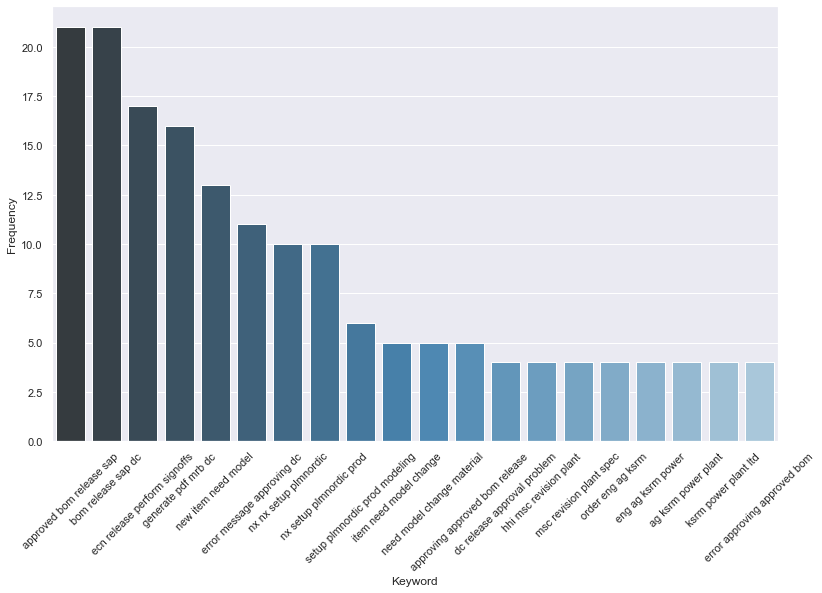

In [13]:
import pandas
fwords=["please",'to',"hi","hello","on"]
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(4,4),  
            max_features=2000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    words_freq=[i for i in words_freq if i not in fwords ]
    return words_freq[:n]


# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)
#top_df.to_csv(file_prefix + '_top_words.csv')

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
#g.figure.savefig(file_prefix + "_keyword.png", bbox_inches = "tight")

In [14]:
dataset

,Issue ID,Title,Description,Issue Status,Resolution,word_count
0,2142,ER-Classification quality improvement,"Hi,\nfind attached one example of possible cle...",Active,​Moved to DATA Streaming,3
1,2182,ER-STEP Type Dataset,Hi\nIs it possible to add a „new“ dataset type...,Active,NaN,3
2,2229,ER-BOM REPORT ISSUES,"Hi Omar,\nI just discussed this with hiresh. B...",Active,NaN,3
3,2497,ER-VS: Vekt fra TC til SAP,"Hi,\nFind attached list of wheigths. How can w...",Active,NaN,6
4,2508,ER-VS: Vekt fra TC til SAP,Data Stream,Active,NaN,6
...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error during approval. Please check and comple...,Resolved,​1,2
2894,1334,DC0202059 error,One more similar error. Please check and compl...,Resolved,​1,2
2895,1344,Type of error when saving BOM in tc,"When saving BOM in TC, I get this message:\nDo...",Resolved,​1,8
2896,1346,URGENT!! CAD files of standard parts,Can you please create CAD parts off the follow...,Resolved,1,6


In [15]:
dataset[datacol].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
from nltk.tokenize import word_tokenize


dataset[datacol] = [entry.lower() for entry in dataset[datacol]]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
dataset[datacol]= [word_tokenize(entry) for entry in dataset[datacol]]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun


In [16]:
from nltk.corpus import wordnet as wn
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [17]:
from nltk import pos_tag
for index,entry in enumerate(dataset[datacol]):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    dataset.loc[index,'text_final'] = str(Final_words)

In [18]:
for index,entry in enumerate(dataset[datacol]):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    if "sap" in Final_words:
        dataset.loc[index,'desc'] = str("sap")
    elif "erp" in Final_words:
        dataset.loc[index,'desc'] = str("erp")
    elif "bom" in Final_words:
        dataset.loc[index,'desc'] = str("bom")
    elif "teamcenter" in Final_words:
        dataset.loc[index,'desc'] = str("teamcent")
    elif "design" in Final_words:
        dataset.loc[index,'desc'] = str("design")
    elif "document" in Final_words:
        dataset.loc[index,'desc'] = str("document")
    elif "item" in Final_words:
        dataset.loc[index,'desc'] = str("item")
    elif "material" in Final_words:
        dataset.loc[index,'desc'] = str("materi")
    elif "error" in Final_words:
        dataset.loc[index,'desc'] = str("error")
    elif "ticket" in Final_words:
        dataset.loc[index,'desc'] = str("ticket")
    else:
        dataset.loc[index,'desc'] = str("Others")
        

In [19]:
print("Enter the key word")
word=input()
sap_data=dataset[dataset['desc']==word]

Enter the key word
sap


In [26]:
dataset

,Issue ID,Title,Description,Issue Status,Resolution,word_count,text_final,desc
0,2142,"[er-classification, quality, improvement]","Hi,\nfind attached one example of possible cle...",Active,​Moved to DATA Streaming,3,"['quality', 'improvement']",Others
1,2182,"[er-step, type, dataset]",Hi\nIs it possible to add a „new“ dataset type...,Active,NaN,3,"['type', 'dataset']",Others
2,2229,"[er-bom, report, issues]","Hi Omar,\nI just discussed this with hiresh. B...",Active,NaN,3,"['report', 'issue']",Others
3,2497,"[er-vs, :, vekt, fra, tc, til, sap]","Hi,\nFind attached list of wheigths. How can w...",Active,NaN,6,"['vekt', 'fra', 'tc', 'til', 'sap']",sap
4,2508,"[er-vs, :, vekt, fra, tc, til, sap]",Data Stream,Active,NaN,6,"['vekt', 'fra', 'tc', 'til', 'sap']",sap
...,...,...,...,...,...,...,...,...
2893,1326,"[dc0201996, error]",Error during approval. Please check and comple...,Resolved,​1,2,['error'],error
2894,1334,"[dc0202059, error]",One more similar error. Please check and compl...,Resolved,​1,2,['error'],error
2895,1344,"[type, of, error, when, saving, bom, in, tc]","When saving BOM in TC, I get this message:\nDo...",Resolved,​1,8,"['type', 'error', 'save', 'bom', 'tc']",bom
2896,1346,"[urgent, !, !, cad, files, of, standard, parts]",Can you please create CAD parts off the follow...,Resolved,1,6,"['urgent', 'cad', 'file', 'standard', 'part']",Others


In [27]:
sap_data

,Issue ID,Title,Description,Issue Status,Resolution,word_count,text_final,desc
3,2497,"[er-vs, :, vekt, fra, tc, til, sap]","Hi,\nFind attached list of wheigths. How can w...",Active,NaN,7,"['vekt', 'fra', 'tc', 'til', 'sap']",sap
4,2508,"[er-vs, :, vekt, fra, tc, til, sap]",Data Stream,Active,NaN,7,"['vekt', 'fra', 'tc', 'til', 'sap']",sap
6,2539,"[er-re, :, wrong, drawing, revision, in, sap]",Thanks for the feedback Liam.\nWe can send a e...,Active,NaN,7,"['wrong', 'draw', 'revision', 'sap']",sap
7,2573,"[er-enhancement, request, :, pnas, check, for,...","Hi,\nCan we add 2 new checks; and report it as...",Active,NaN,11,"['request', 'pnas', 'check', 'release', 'sap',...",sap
20,2826,"[er-material, for, item, d1111706298, missing,...","Hi,\nHappy new year!\nWe seem to have lost som...",Active,NaN,7,"['item', 'miss', 'sap']",sap
...,...,...,...,...,...,...,...,...
2820,534,"[d1111203311.w, with/without, w, in, sap]","In SAP, requisitions are made for both D111120...",Resolved,​1,5,"['w', 'sap']",sap
2830,565,"[manglende, produktinformasjon, i, sap]",Disse tre støperimaterialene ser veldig mangel...,Resolved,​1,4,"['manglende', 'produktinformasjon', 'sap']",sap
2858,764,"[help, with, mismatch, between, tc, and, sap, ...",hope you can help with understanding why there...,Resolved,​1,8,"['help', 'mismatch', 'tc', 'sap', 'bom']",sap
2875,1179,"[please, release, bauhiresh, to, sap]",Please release following bauhiresh to SAP,Resolved,​The BOM CXSS00705794 is sent to SAP with ECN ...,5,"['please', 'release', 'bauhiresh', 'sap']",sap


In [28]:
corpus = []
#stop_words=['', 'bom', 'design', 'document', 'erp', 'error', 'item', 'sap']

sap_data['word_count'] = sap_data[datacol].apply(lambda x: len(str(x).split(" ")))
ds_count = len(sap_data.word_count)
for i in range(0, ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(dataset[datacol][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    #print(stop_words)
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

C:\Users\Pratyush\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
print(corpus)

['er classification quality improvement', 'er step type dataset', 'er bom report issue', 'er v vekt fra tc til sap', 'er v vekt fra tc til sap', 'er v forbedringsforslag klassesuffix prose', 'er wrong drawing revision sap', 'er enhancement request pnas check release sap description', 'er copy paste item revision dw item revision', 'er removing old document id document rv id', 'er fw ar tekst', 'er classification attribute plf form', 'er ocn approval complete mail workflow name added subject mail', 'er ocn workflow getting correct excel', 'er setup outlook item tc', 'branch stainless steel aisi', 'w urgent obsolete material j cock', 'er fw document added td document', 'er referenced report show incorrect result', 'er tc issue', 'er material item missing sap', 'er setup material status incorrect m', 'er export level drawing tool revision exported', 'regarding ip secured classification property part', 'renaming classification structure', 'new structure tarpaulin tc classification', 'er ma

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import re
#print(stop_words)
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)
m=list(cv.vocabulary_.keys())[:10]

                                   Keyword  Frequency
0                       er vekt fra tc til          2
1                      vekt fra tc til sap          2
2              fw approved bom release sap          2
3              approved bom release sap dc          2
4                urgent mrp run change erp          2
5            urgent transfere sap tc multi          2
6            er wrong drawing revision sap          1
7        er enhancement request pnas check          1
8   enhancement request pnas check release          1
9           request pnas check release sap          1
10      pnas check release sap description          1
11             er copy paste item revision          1
12             copy paste item revision dw          1
13             paste item revision dw item          1
14          item revision dw item revision          1
15             er removing old document id          1
16       removing old document id document          1
17             old document 

[Text(0, 0, 'er vekt fra tc til'),
 Text(0, 0, 'vekt fra tc til sap'),
 Text(0, 0, 'fw approved bom release sap'),
 Text(0, 0, 'approved bom release sap dc'),
 Text(0, 0, 'urgent mrp run change erp'),
 Text(0, 0, 'urgent transfere sap tc multi'),
 Text(0, 0, 'er wrong drawing revision sap'),
 Text(0, 0, 'er enhancement request pnas check'),
 Text(0, 0, 'enhancement request pnas check release'),
 Text(0, 0, 'request pnas check release sap'),
 Text(0, 0, 'pnas check release sap description'),
 Text(0, 0, 'er copy paste item revision'),
 Text(0, 0, 'copy paste item revision dw'),
 Text(0, 0, 'paste item revision dw item'),
 Text(0, 0, 'item revision dw item revision'),
 Text(0, 0, 'er removing old document id'),
 Text(0, 0, 'removing old document id document'),
 Text(0, 0, 'old document id document rv'),
 Text(0, 0, 'document id document rv id'),
 Text(0, 0, 'er classification attribute plf form')]

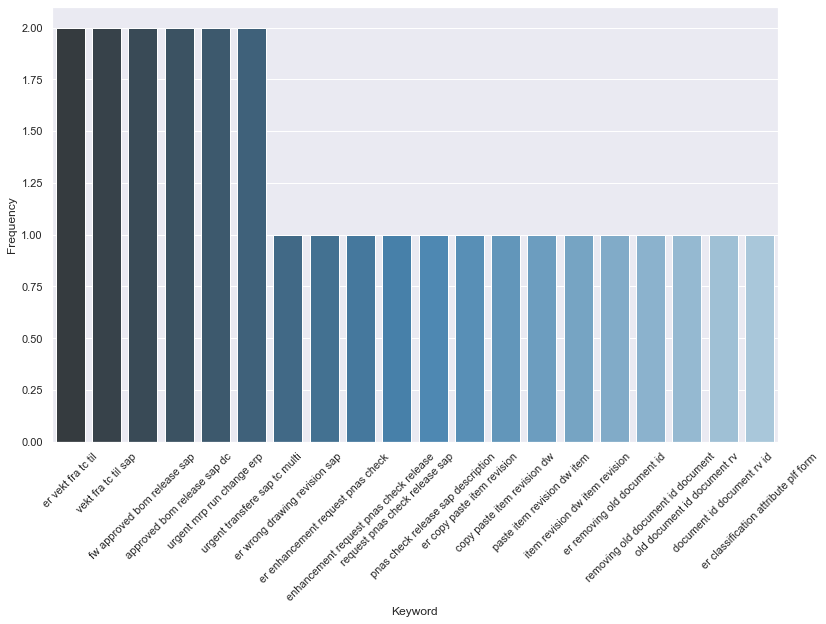

In [31]:
import pandas
fwords=["please",'to',"hi","hello","on"]
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(5,5),  
            max_features=2000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    words_freq=[i for i in words_freq if i not in fwords ]
    return words_freq[:n]


# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)
#top_df.to_csv(file_prefix + '_top_words.csv')

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
#g.figure.savefig(file_prefix + "_keyword.png", bbox_inches = "tight")